# Pair Programming 25/05 Regresión lineal simple I - Tatiana y Guada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ejercicio 1
Buscar un conjunto de datos a analizar:
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilidar los análisis.

👩🏻👩🏻‍🦰💬

Hemos tomado el Dataset de Kaggle. "Salary Prediction Classification Classification on Salary whether less than 50K or greater than 50K". Este Dataset es acerca de la predicción del salario en la población adulta de cada estado de los Estados Unidos. Dejamos por aquí la explicación del contenido de las columnas para facilitarnos el análisis.

age: edad

workclass: Tipo de trabajo. 
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education:Nivel de educación. 
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Años de educación
    
marital-status: Estado civil. 
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: ocupación. 
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Relaciíon.
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: Raza
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: sexo
Female, Male.

capital-gain: se refiere al aumento en el valor de un activo de capital cuando se vende. En pocas palabras, una ganancia de capital ocurre cuando vende un activo por más de lo que pagó originalmente por él. Casi cualquier tipo de activo que posea es un activo de capital, ya sea un tipo de inversión (como acciones, bonos o bienes raíces) o algo comprado para uso personal (como muebles o un bote).

capital-loss: Una pérdida de capital es la pérdida en la que se incurre cuando un activo de capital , como una inversión o un bien inmueble, disminuye de valor. Esta pérdida no se realiza hasta que el activo se vende por un precio inferior al precio de compra original.

hours-per-week: horas trabajadas por semana

native-country: País de origen
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: Rango salarial
<=50K or >50K


In [2]:
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


La columna "fnlwgt" la eliminamos, ya que nos parece que sus datos no son relevantes en nuestro análisis.

In [ ]:
df.drop("fnlwgt",axis=1, inplace=True)

# Ejercicio 2 
Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.
Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [4]:
df.shape

(32561, 14)

In [5]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [34]:
num_nulos = df.isnull().sum()
porcentaje = (num_nulos / df.shape[0] * 100).round(2)
porcentaje

age               0.0
workclass         0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [31]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Ejercicio 3 
Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados.

In [6]:
df.stb.missing()#comprobamos que no tengan valores faltantes las variables a utilizar

,missing,total,percent
age,0,32561,0.0
workclass,0,32561,0.0
education,0,32561,0.0
education-num,0,32561,0.0
marital-status,0,32561,0.0
occupation,0,32561,0.0
relationship,0,32561,0.0
race,0,32561,0.0
sex,0,32561,0.0
capital-gain,0,32561,0.0


In [7]:
df.dtypes #comprobamos que las variables que vamos a usar sean de tipo númerico

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

    # En tutoria comentar que hicimos estas gráficas para seleccionar una que tuviera relación lineal pero no identificamos ninguna. Inicialmente queriamos hacer la predicción sobre el salario pero al ser de tipo object y tener solo dos rangos cambiamos de opinión.

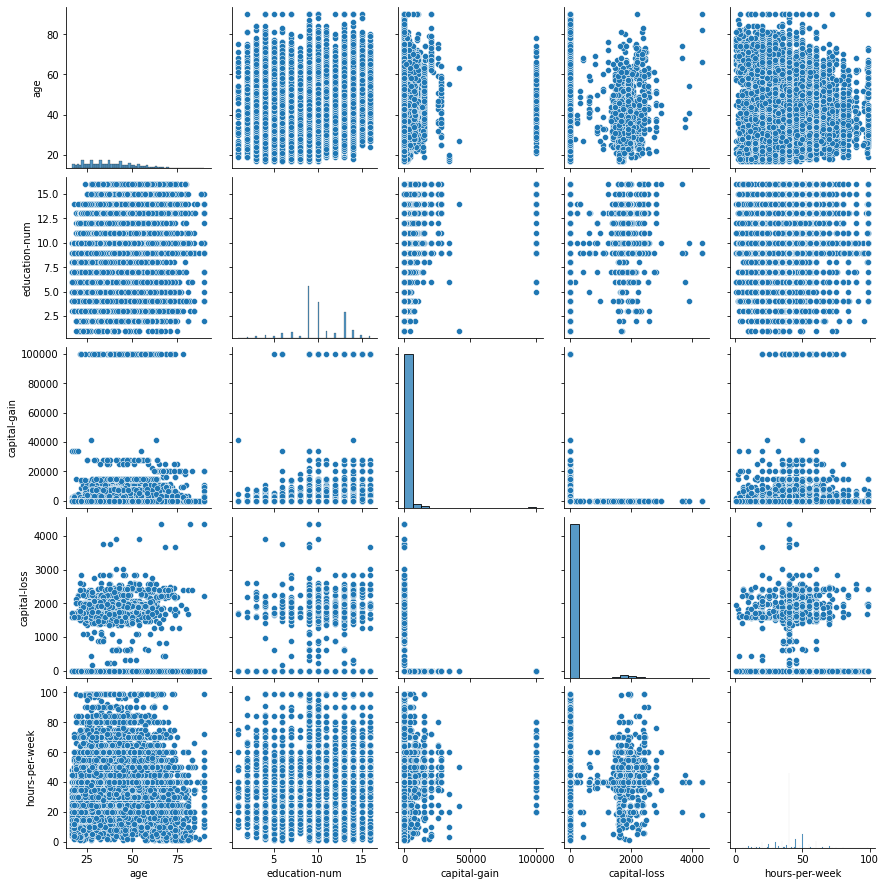

In [12]:
sns.pairplot(df) 

In [9]:
x=df['age'].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.En x ponemos la variable dependiente
y= df['capital-gain'].values.reshape(-1, 1) # La variable independiente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

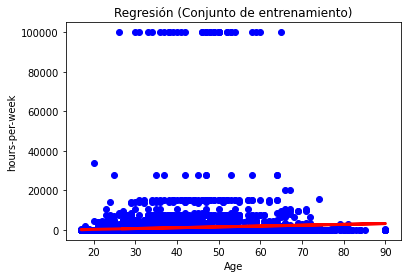

In [11]:
plt.scatter(x_test,y_test,color="blue")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red", linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel('Age')
plt.ylabel('hours-per-week')
plt.show()

# Ejercicio 4 
Interpretación de los resultados.
Ahora interpreta los resultados obtenidos del ajuste lineal simple y explica lo mejor posible la naturaleza de los mismos.